In [26]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [27]:
data1=pd.read_csv('housing.csv')
data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [28]:
np.percentile(data1['median_house_value'],90)

376600.0

In [29]:
sum=0
for i in data1['median_house_value']:
    if(i>np.percentile(data1['median_house_value'],90)):
        sum+=1

print(sum)

2063


In [30]:
sum=0
for i in data1['total_bedrooms']:
    if(i>np.percentile(data1['total_bedrooms'],90)):
        sum+=1

print(sum)

0


# Gradient Descent :- 
###                     It is an optimization algorithm for finding a local minimum of a differentiable function.
## formula :-
#####       x n + 1 = x n − α ∇ f ( x n )

# MSE:-
#### MSE can stand for Mean Squared Error. It is a metric used in machine learning and regression analysis to evaluate the performance of predictive models.
## FORMULA :-
##### MSE = Σ(yi − pi)2n

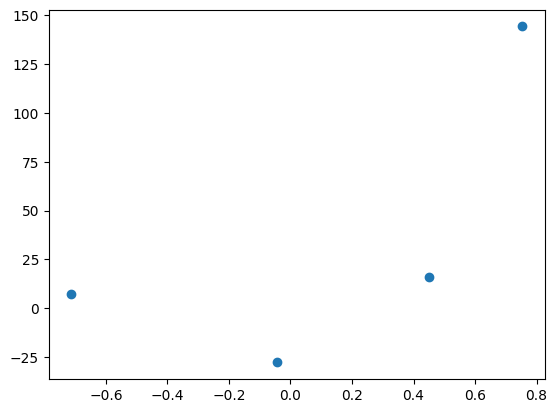

In [31]:
x,y=make_regression(n_samples=4,n_features=1,n_targets=1,noise=80,random_state=13)
plt.scatter(x,y)

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(x,y)

LinearRegression()

In [34]:
print(lr.coef_)

[78.35063668]


In [35]:
print(lr.intercept_)

26.15963284313262


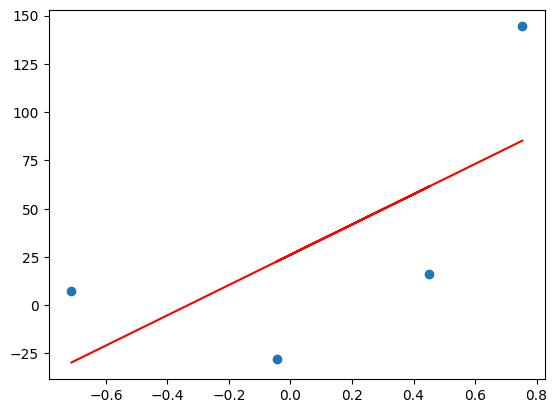

In [36]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red')

In [37]:
y_pred=((78.35*x)+26.15).reshape(4)

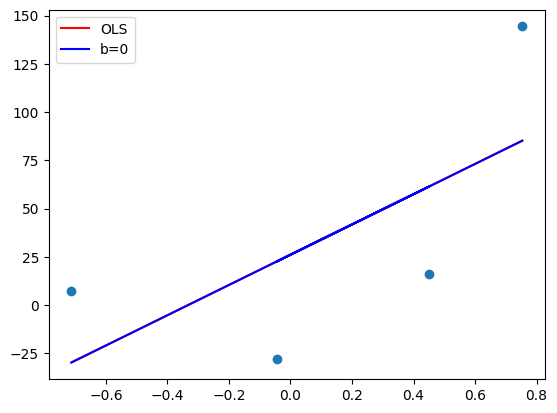

In [38]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='blue',label='b=0')
plt.legend()
plt.show()

In [39]:
y_pred=((78.35*x)+100).reshape(4)

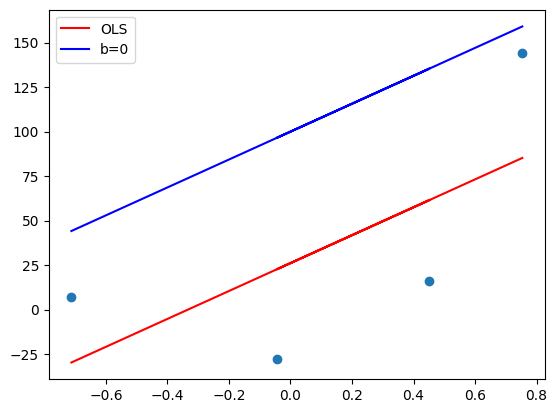

In [40]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='blue',label='b=0')
plt.legend()
plt.show()

In [41]:
m=78.35
b=0
loss_slope=-2*np.sum(y-m*x.ravel()-b)
loss_slope

-209.27763408209216

In [42]:
learningRate=0.1
setp_size=loss_slope*learningRate
setp_size

-20.927763408209216

In [43]:
b=b-setp_size
b

20.927763408209216

In [44]:
lr

LinearRegression()

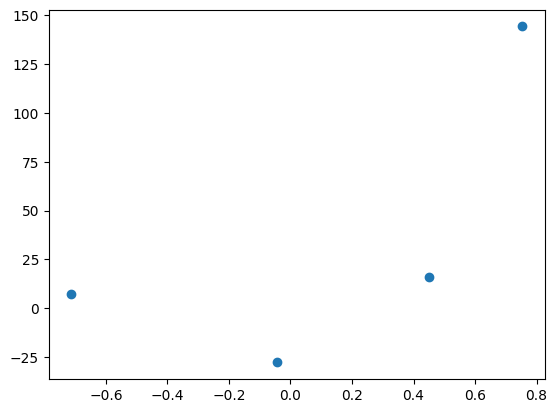

In [45]:
y_pred1=((78.35*x)+b).reshape(4)
plt.scatter(x,y)

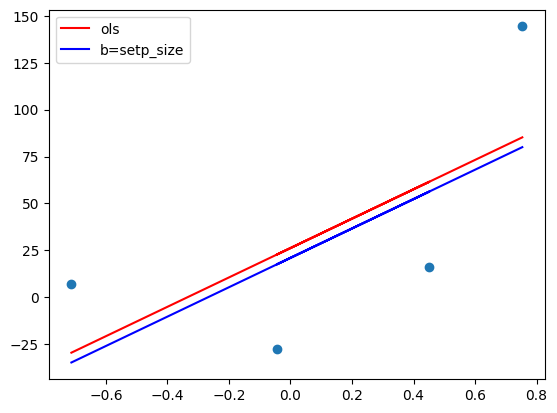

In [46]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='ols')
plt.plot(x,y_pred1,color='blue',label='b=setp_size')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import r2_score
r2 = r2_score(y_pred1,lr.predict(x))

In [48]:
r2

0.9855159167836397

In [52]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,lr.predict(x))

73.84029573973848